loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


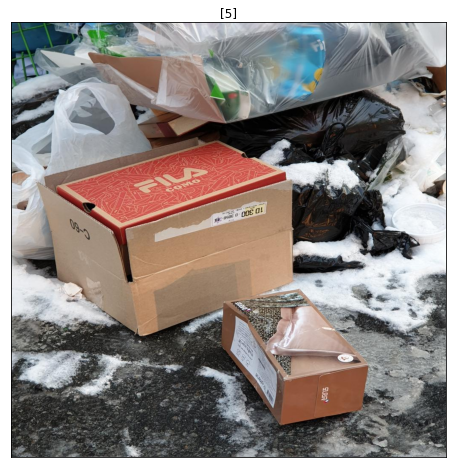

In [26]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os
import numpy as np

data_dir = ('/opt/ml/detection/dataset')
coco = COCO('train.json')

img_id = coco.getImgIds(imgIds=5)
img_info = coco.loadImgs(img_id)[0]

img = cv2.imread(os.path.join(data_dir, img_info['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
img /= 255.0

plt.figure(figsize=(8,8))
plt.title(img_id)
plt.xticks([]); plt.yticks([])
plt.imshow(img)





loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


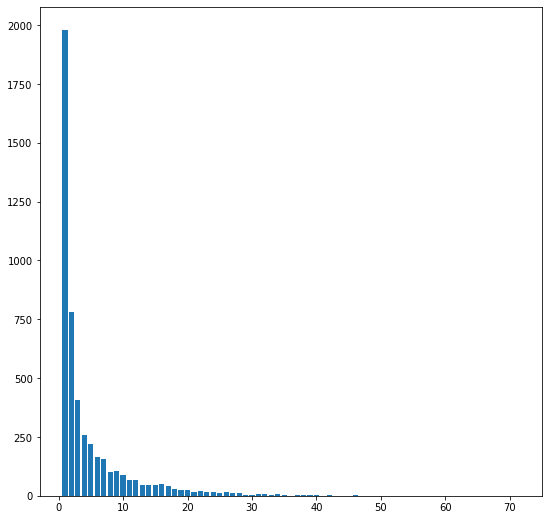

Counter({1: 1980, 2: 783, 3: 405, 4: 259, 5: 218, 6: 166, 7: 157, 9: 107, 8: 102, 10: 88, 11: 67, 12: 66, 16: 49, 13: 48, 14: 46, 15: 45, 17: 40, 18: 27, 19: 23, 20: 23, 22: 20, 26: 17, 21: 16, 24: 16, 23: 15, 25: 14, 28: 13, 27: 11, 31: 9, 32: 9, 34: 6, 30: 5, 29: 5, 33: 3, 38: 3, 37: 3, 35: 3, 46: 3, 40: 3, 39: 2, 42: 2, 48: 1, 55: 1, 44: 1, 52: 1, 71: 1, 41: 1})


In [13]:
from collections import Counter
import json

tr_coco = COCO('/opt/ml/detection/dataset/train.json')
with open('/opt/ml/detection/dataset/train.json') as f:
    train_ann = json.load(f)


def id2objnum(ann):
    return len(tr_coco.getAnnIds(imgIds=ann['id']))

obj_num = [id2objnum(ann) for ann in train_ann['images']]
counts = Counter(obj_num)

fig = plt.figure(figsize=(9,9))
plt.bar(counts.keys(), counts.values(), align='center')
plt.show()

print(counts)



In [25]:
tr_boxes = []

def bbox2wh(bbox):
    return (round(bbox[2]), round(bbox[3]))

for ann in train_ann['images']:
    img_id = ann['id']
    ann_ids = tr_coco.getAnnIds(imgIds=img_id)

    tr_boxes += [bbox2wh(tr_coco.loadAnns(ann)[0]['bbox']) for ann in ann_ids]

counts = Counter(tr_boxes)
counts = list(counts)
# counts = counts.sort(key=lambda x: x[1])
print(counts)

None


In [31]:
# 클래스 별 bbox 사이즈 평균
cate_box_dict = dict()

def bbox2wh(bbox):
    return (round(bbox[2]), round(bbox[3]))

for anno in train_ann['annotations']:
    if cate_box_dict.get(anno['category_id']):
        cate_box_dict[anno['category_id']].append(bbox2wh(anno['bbox']))
    else:
        cate_box_dict[anno['category_id']] = [bbox2wh(anno['bbox'])]

cate_boxsize_dict = dict()
# cate_box_dict
for cate in cate_box_dict:
    width = [box[0] for box in cate_box_dict[cate]]
    height = [box[1] for box in cate_box_dict[cate]]

    cate_boxsize_dict[cate] = (round(sum(width)/len(width), 1), round(sum(height)/len(height), 1))

cate_boxsize_dict

{0: (226.2, 215.5),
 3: (251.0, 257.2),
 7: (275.4, 301.2),
 4: (206.1, 271.9),
 5: (239.4, 230.7),
 2: (244.9, 220.1),
 6: (299.2, 252.3),
 1: (263.9, 236.7),
 9: (394.7, 391.7),
 8: (228.9, 215.0)}